

---


#  🟢 Plota Mapa de Acumulado de Focos de Calor para Vários Anos

---
**DADOS**:

 - Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/



---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 04/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---

# **1° Passo:** Preparando ambiente

In [1]:
# instalações
!pip install -q ultraplot cartopy salem rasterio

# Bibliotecas para manipulação de arquivos e sistema
import glob                                 # Lista arquivos em diretórios usando padrões (ex: *.nc)
import time                                 # Medição de tempo de execução e operações relacionadas a tempo

# Bibliotecas para computação numérica e dados
import numpy as np                          # Operações matemáticas eficientes com arrays multidimensionais
import pandas as pd                         # Manipulação e análise de dados em estruturas tabulares (DataFrames)
import xarray as xr                         # Trabalho com arrays multidimensionais rotulados (comum em dados científicos)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt             # Criação de gráficos e visualizações 2D/3D (biblioteca base)
import ultraplot as uplt                    # Visualização especializada para dados meteorológicos

# Bibliotecas para georreferenciamento e mapeamento
import cartopy                              # Ferramentas para criação de mapas e projeções cartográficas
import cartopy.crs as ccrs                  # Sistemas de referência de coordenadas para projeções de mapas
import cartopy.io.shapereader as shpreader  # Leitura de arquivos shapefile para mapas
import salem                                # Integração de dados geoespaciais com xarray

# Controle de avisos
import warnings                             # Gerenciamento de mensagens de alerta durante a execução
warnings.filterwarnings("ignore")           # Supressão de avisos para manter a saída limpa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **2° Passo:** Declarando Funções

In [2]:
# Função que calcula o índice i e j da localização do foco de calor
def index(longitudes_matriz, latitudes_matriz, lon_foco, lat_foco):

    ''' Função para calcular o índice (i e j) do pixel de uma matriz que o relâmpago pertence

    Parâmetros:
               longitudes_matriz (array): array de uma dimensão das longitudes da matriz em graus
               latitudes_matriz (array): array de uma dimensão das latitudes da matriz em graus
               lon_raio (float): valor da longitude do foco em graus
               lat_raio (float): valor da latitude do foco em graus

    Retorna:
            indice_lat_raio (float): índice da latitude (ou seja, da linha) do pixel da matriz que o foco pertence
            indice_lon_raio (float): índice da longitude (ou seja, da coluna) do pixel da matriz que o foco pertence
    '''

    # calcula a diferença entre as lats/lons da matriz e a latitude/longitude do foco
    distancia_lon = (longitudes_matriz - lon_foco)**2
    distancia_lat = (latitudes_matriz - lat_foco)**2

    # índice da longitude e latitude do foco
    indice_lon_foco = np.nonzero(distancia_lon == np.min(distancia_lon))
    indice_lat_foco  = np.nonzero(distancia_lat == np.min(distancia_lat))

    # retorna os valores dos índices calculados
    return indice_lat_foco, indice_lon_foco

# **3° Passo:** Lendo os Dados do INPE

In [3]:
%%time
# define dataframe final
df = pd.DataFrame()

# FTP dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# ano inicial e final: neste caso de 2003 a 2024
anoi, anof = '2003', '2025'

# loop dos meses
for ano in range(int(anoi), int(anof)):
    print(ano)

    # nome do arquivo
    filename = f'focos_br_ref_{str(ano)}.zip'

    # leitura da tabela: 2023
    df0 = pd.read_csv(f'{url}focos_br_ref_{str(ano)}.zip', compression='zip')

    # junta a tabela que foi lida com a anterior
    df = pd.concat([df0, df], ignore_index=True)

# transforma a coluna "data_pas" para o formato "datetime"
df['data_pas'] = pd.to_datetime(df['data_pas'])

# seta a coluna "data_pas" como o índice da tabela
df.set_index('data_pas', inplace=True)

# ordena a tabela pelo índice
df.sort_index(inplace=True)

# mostra os dados
df

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
CPU times: user 24.3 s, sys: 4.24 s, total: 28.5 s
Wall time: 1min 31s


,id_bdq,foco_id,lat,lon,pais,estado,municipio,bioma
data_pas,,,,,,,,
2003-01-01 16:04:00,8093720,546621ea-5abb-11e8-911c-28924ad12c5c,-15.62100,-41.66500,Brasil,MINAS GERAIS,BERIZAL,Mata Atlântica
2003-01-01 16:04:00,8093721,546621eb-5abb-11e8-911c-28924ad12c5c,-15.27600,-41.51400,Brasil,BAHIA,TREMEDAL,Mata Atlântica
2003-01-01 16:04:00,8093724,546621ec-5abb-11e8-911c-28924ad12c5c,-14.82900,-40.13300,Brasil,BAHIA,NOVA CANAÃ,Mata Atlântica
2003-01-01 16:05:00,8093750,546621f8-5abb-11e8-911c-28924ad12c5c,-11.00900,-40.48500,Brasil,BAHIA,MIRANGABA,Caatinga
2003-01-01 16:05:00,8093755,546621fd-5abb-11e8-911c-28924ad12c5c,-11.51900,-37.54600,Brasil,SERGIPE,INDIAROBA,Mata Atlântica
...,...,...,...,...,...,...,...,...
2024-12-31 17:53:00,1739558058,e9f7a636-8f3b-3683-9186-db0b958f136f,-1.20924,-52.02020,Brasil,PARÁ,ALMEIRIM,Amazônia
2024-12-31 17:53:00,1739558043,af2a74f7-3abf-3e08-a339-296b6eabbe11,-1.81534,-53.97981,Brasil,PARÁ,MONTE ALEGRE,Amazônia
2024-12-31 17:53:00,1739557810,c3e41455-95ef-3336-9034-3c38696b2b70,-1.21053,-52.02901,Brasil,PARÁ,ALMEIRIM,Amazônia


# **4° Passo:** Acumula na Grade. Acumulado dos focos por ano para o Brasil e salvos em arquivos netcdf.

In [4]:
%%time
# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# Espaçamento da grade
delta = 20/100.   # grade com 20 km de resolução espacial

# Montando a grade
lons = np.arange(lonmin, lonmax, delta)
lats = np.arange(latmax, latmin, -delta)

# Quantidade de pontos para longitude e latitude
nlon = len(lons)
nlat = len(lats)

# Loop dos anos
for ano in np.arange(2003,2025):

    print('Processando ===>>>', ano)

    # seleciona o mês
    df_selec = df.loc[str(ano)]

    # gera matriz de raios
    focos_lon, focos_lat = df_selec['lon'].values, df_selec['lat'].values

    # interpolando para ponto de grade
    focos = np.zeros((nlat, nlon))

    # loop em cada longitude e latitude da lista
    for lonfoco, latfoco in zip(focos_lon, focos_lat):

        # função que extrai a qual pixel aquele relâmpago pertence
        lin, col = index(lons, lats, lonfoco, latfoco)

        # soma os relâmpagos por pixel
        focos[lin,col]+=1

    # gera arquivo netcdf
    data_vars = {'focos':(('lat', 'lon'), focos, {'units': 'ocorrências/400km²', 'long_name':'Focos de Calor'})}
    coords = {'lat': lats, 'lon': lons}
    ds = xr.Dataset(data_vars=data_vars, coords=coords)
    ds.to_netcdf(f'focos_anual_Brasil_AQUA_{str(ano)}.nc')

Processando ===>>> 2003
Processando ===>>> 2004
Processando ===>>> 2005
Processando ===>>> 2006
Processando ===>>> 2007
Processando ===>>> 2008
Processando ===>>> 2009
Processando ===>>> 2010
Processando ===>>> 2011
Processando ===>>> 2012
Processando ===>>> 2013
Processando ===>>> 2014
Processando ===>>> 2015
Processando ===>>> 2016
Processando ===>>> 2017
Processando ===>>> 2018
Processando ===>>> 2019
Processando ===>>> 2020
Processando ===>>> 2021
Processando ===>>> 2022
Processando ===>>> 2023
Processando ===>>> 2024
CPU times: user 3min 30s, sys: 578 ms, total: 3min 30s
Wall time: 3min 42s


In [5]:
# mostrando arquivo gerado de 2023
ds_2023 = xr.open_dataset('/content/focos_anual_Brasil_AQUA_2023.nc')
ds_2023

<xarray.Dataset> Size: 356kB
Dimensions:  (lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 2kB 7.0 6.8 6.6 6.4 6.2 ... -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 2kB -75.0 -74.8 -74.6 -74.4 ... -33.6 -33.4 -33.2
Data variables:
    focos    (lat, lon) float64 353kB ...

# **5° Passo:** Plota Figura

Processando o ano: .... 2003
Processando o ano: .... 2004
Processando o ano: .... 2005
Processando o ano: .... 2006
Processando o ano: .... 2007
Processando o ano: .... 2008
Processando o ano: .... 2009
Processando o ano: .... 2010
Processando o ano: .... 2011
Processando o ano: .... 2012
Processando o ano: .... 2013
Processando o ano: .... 2014
Processando o ano: .... 2015
Processando o ano: .... 2016
Processando o ano: .... 2017
Processando o ano: .... 2018
Processando o ano: .... 2019
Processando o ano: .... 2020
Processando o ano: .... 2021
Processando o ano: .... 2022
Processando o ano: .... 2023
Processando o ano: .... 2024
CPU times: user 2min 31s, sys: 1.83 s, total: 2min 33s
Wall time: 2min 52s


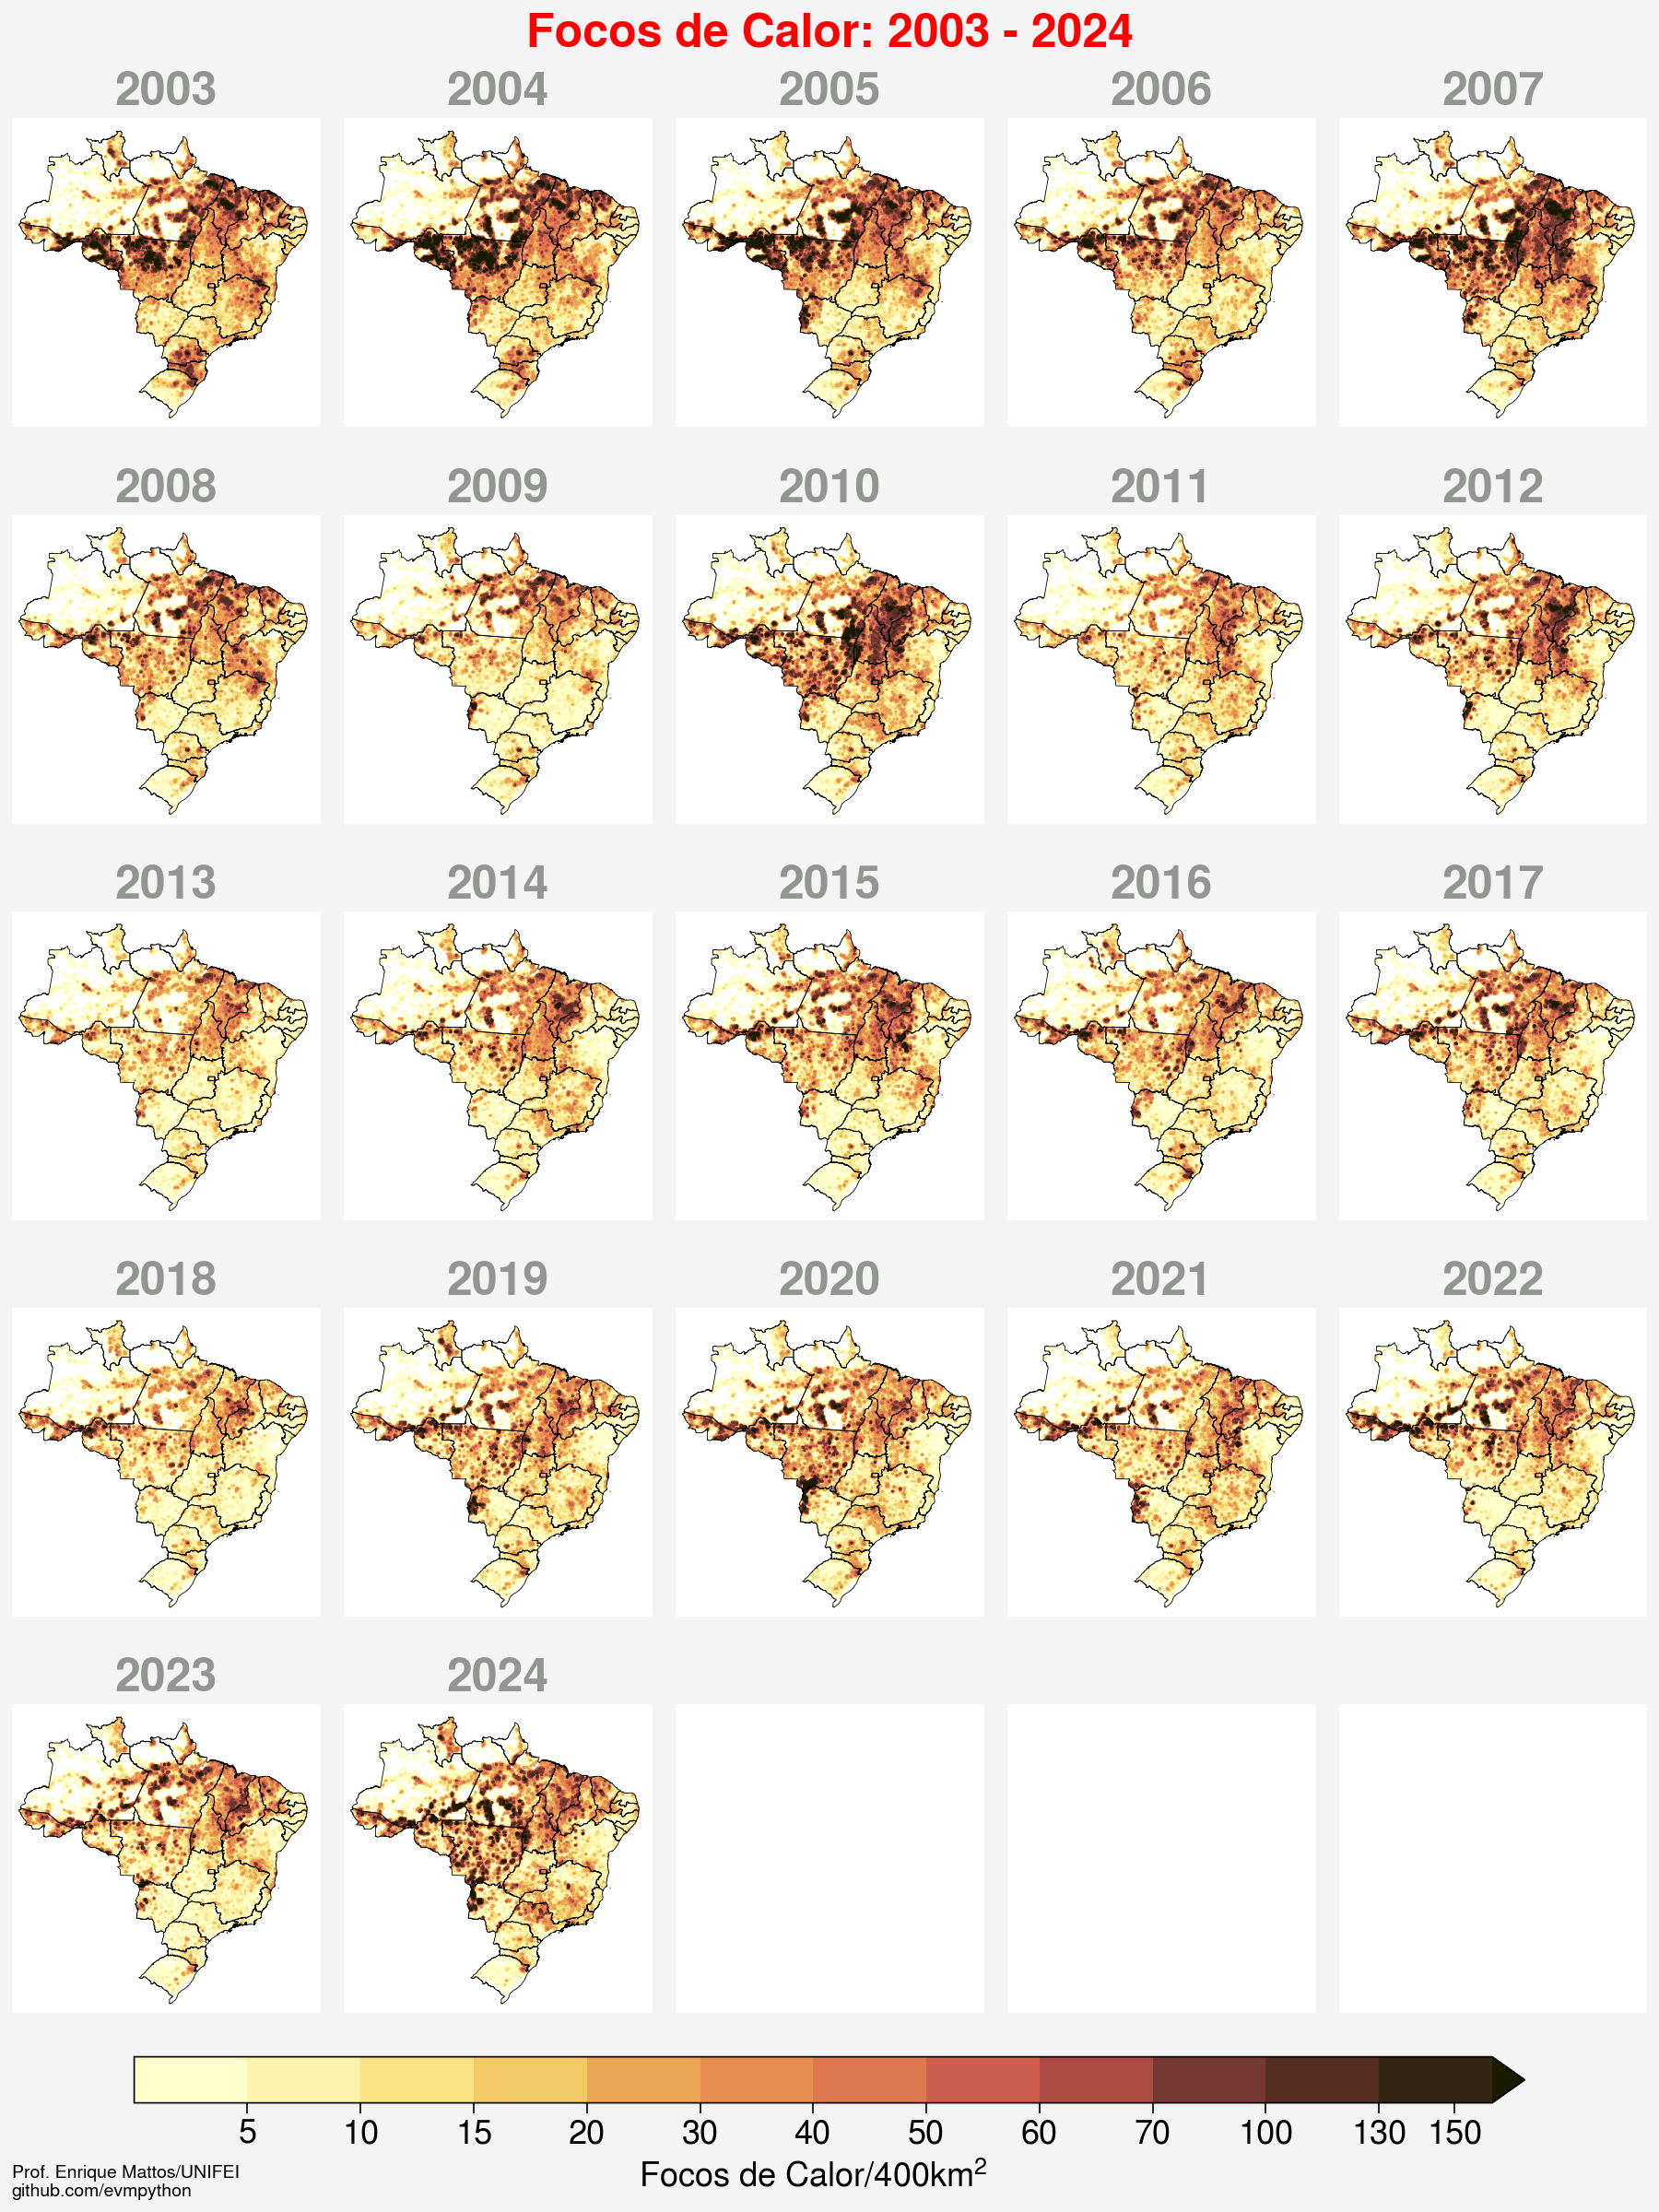

In [14]:
%%time
# leitura do shapefile do Brasil
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(9,12),
                        nrows=5, ncols=5,
                        tight=True,
                        proj='pcarree',
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Focos de Calor: 2003 - 2024',
          small='20px', large='25px',
          linewidth=0, grid=False, suptitlecolor='red')

# loop dos anos
for i, ano in enumerate(np.arange(2003, 2025)):

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # leitura dos arquivos
  ds = xr.open_dataset(f'/content/focos_anual_Brasil_AQUA_{str(ano)}.nc')

  # plota figura
  map1 = ax[i].contourf(ds['lon'],
                        ds['lat'],
                        ds['focos'][:,:].salem.roi(shape=shapefile_brasil),
                        cmap='lajolla',
                        vmin=0.1, vmax=160,
                        levels=np.array([0.1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 100, 130, 160]),
                        extend='max')

  # titulo de cada figura
  ax[i].format(title=f'{str(ano)}', labels = False, titleloc='c', titlecolor='grey', titleweight='bold')

  # shapefiles dos Estados
  shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp').geometries())
  ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

# informação na figura
ax[20].annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(lonmin,latmin-25), fontsize=7, color='black')

# barra de cores
fig.colorbar(map1,
             loc='b',
             label='Focos de Calor/400km$^2$',
             ticklabelsize=13,
             labelsize=13,
             length=0.85,
             width=0.25,
             space=0.0,
             ticks=[5, 10, 15, 20, 30, 40, 50, 60, 70, 100, 130, 150],
             ticklabels=['5', '10', '15', '20', '30', '40', '50', '60', '70', '100', '130', '150'])

# salva figura
fig.savefig('02_focos_anual_2003_to_2024_brasil.jpg', transparent=True, dpi=300, bbox_inches="tight")